Zhiting Zhou 11/13/2023

In [134]:
import random
import matplotlib.pyplot as plt
import math
import numpy as np

In [135]:
# variables
brown = 0
purple = 1

monte_carlo = 100
random_seed = 1

In [136]:
# individual agent's policy
def policy(states=None, func=None, impacted_by_portion=None, confidence=None, impact_from_others=None, cost_of_state=None):
    rt_value = 0 # assume the agent returns brown if no other condition speficied
    prob_purple = 0
    
    def f(x):
        if func != None:
            result = func(x)
        else: 
            result = math.pow(x, 4)
        return result
    
    if impacted_by_portion != None:
        portion_purple = sum(states) / len(states)
        prob_purple = f(portion_purple)
    
    if confidence != None:
        if confidence > 1 or confidence < 0:
            print('confidence level need to be between 0 and 1')
        else:
            prob_purple = (1-confidence) * prob_purple
        
    if impact_from_others != None:
        if len(impact_from_others) != len(states):
            print("the length of impact should equal to the length of states")
        if sum(impact_from_others) > 1:
            print("impact factros too large")
        else:
            weighted_states = impact_from_others * states
            prob_purple = f(weighted_states)
            
    if cost_of_state != None:
        (state, cost) = cost_of_state # state is set to be purple for now
        prob_purple = (1-cost) * prob_purple
        
    prob_brown = 1 - prob_purple    
    
    p = random.uniform(0, 1)

    if p > prob_purple:
        rt_value = 0
    else:
        rt_value = 1

    return rt_value
        
    

In [137]:
def generate_states(num_agents, num_purple=None):
    if num_purple > num_agents: # Check if the input is valid
        return "m should not be greater than n"
    states = [1] * num_purple + [0] * (num_agents - num_purple)  # List with m zeros and (n-m) ones
    random.shuffle(states)
    return states


In [138]:
def linear(x):
    return x

In [139]:
def simulation(num_agents=1000, depends_on_past_states=True, prev_states=None, 
               func=None, impacted_by_portion=None, confidence=None, impact_from_others=None, cost_of_state=None):
    current_states = np.copy(prev_states)
    for i in range(num_agents):
        if prev_states[i] == 1: # it is already purple
            # do nothing
            current_states[i] = prev_states[i]
        else:
            if depends_on_past_states:
                states = np.copy(prev_states)
            else:
                states = np.copy(current_states)
        
            state = policy(states=states, func=func, impacted_by_portion=impacted_by_portion, confidence=confidence, impact_from_others=impact_from_others, cost_of_state=cost_of_state)
      
            current_states[i] = state
            
    current_purple = sum(current_states) # how many purple we end up with
    past_purple = sum(prev_states)
    increased_purple = current_purple - past_purple
    if increased_purple < 0:
        print(increased_purple)
    return current_states, current_purple, increased_purple

Text(0.5, 0.98, 'The policy only dependent on the portion of adversaries, with linear f')

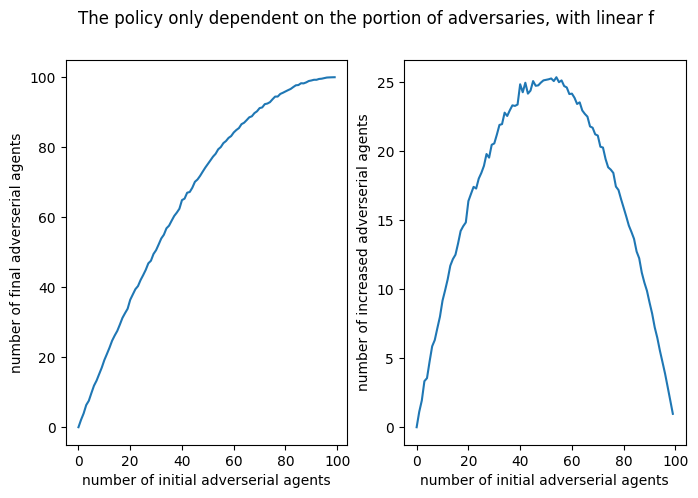

In [140]:
# simulation begins
# random.seed(random_seed)
num_agents = 100
depends_on_past_states = True # if the agent's policy depends on past states or current states?
num_purple = [] # how many purple we end up with
nums = [] # keep track of how many initial purples we tested
num_portion = []
num_increase = []
for num_adv in range(num_agents):
    past_states = generate_states(num_agents=num_agents, num_purple=num_adv) # initial states: i purples, which means i adversaries
    
    # simulate for 10 times
    current_states_carlo = []
    current_purple_carlo = 0
    increased_purple_carlo = 0

    for iter in range(monte_carlo): 

        current_states, current_purple, increased_purple = simulation(num_agents=num_agents, depends_on_past_states=True,prev_states=past_states,
                                                                      func=linear, impacted_by_portion=True, confidence=None, impact_from_others=None, cost_of_state=None)
        if iter == 0:
            current_states_carlo =  np.copy(current_states)
        else:
            current_states_carlo = current_states_carlo + current_states
        current_states_carlo = np.array(current_states_carlo)
        current_purple_carlo += current_purple
        increased_purple_carlo += increased_purple


    current_states = [round(num) for num in current_states_carlo/monte_carlo] # make sure the states are binary
    current_purple = current_purple_carlo/monte_carlo
    increased_purple = increased_purple_carlo/monte_carlo
        
    num_purple.append(current_purple)
    nums.append(num_adv)
    num_increase.append(increased_purple)
    num_portion.append((sum(current_states) - num_adv) / (sum(past_states)+0.001))

plt.subplots(1, 2, figsize=(8, 5))

ax = plt.subplot(1,2,1)
plt.plot(nums, num_purple)
plt.xlabel("number of initial adverserial agents")
plt.ylabel("number of final adverserial agents")

ax = plt.subplot(1,2,2)
plt.plot(nums, num_increase)
plt.xlabel("number of initial adverserial agents")
plt.ylabel("number of increased adverserial agents")

plt.suptitle('The policy only dependent on the portion of adversaries, with linear f')
# ax = plt.subplot(1,3,3)
# plt.plot(nums, num_portion)
# plt.xlabel("number of initial adverserial agents")
# plt.ylabel("number of increased adverserial agents")
# plt.title("the policy depends on the portion of answering purple")
    
    

Text(0.5, 0.98, 'The policy only dependent on the portion of adversaries, with f=x^4')

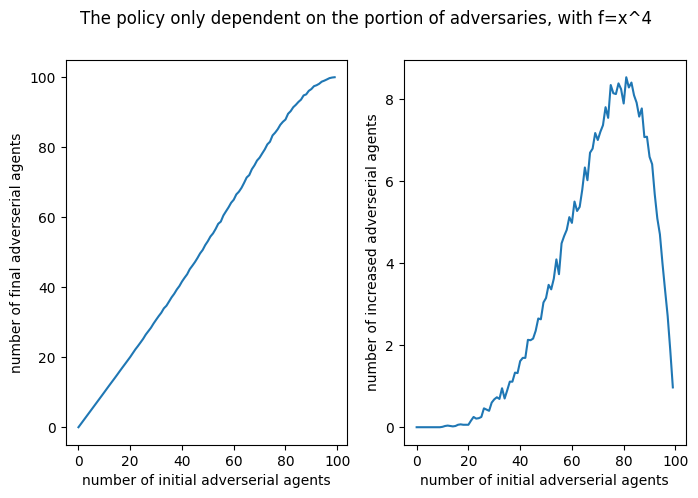

In [141]:
# simulation begins
# random.seed(random_seed)
num_agents = 100
depends_on_past_states = True # if the agent's policy depends on past states or current states?
num_purple = [] # how many purple we end up with
nums = [] # keep track of how many initial purples we tested
num_portion = []
num_increase = []
for num_adv in range(num_agents):
    past_states = generate_states(num_agents=num_agents, num_purple=num_adv) # initial states: i purples, which means i adversaries
    
    # simulate for 10 times
    current_states_carlo = []
    current_purple_carlo = 0
    increased_purple_carlo = 0

    for iter in range(monte_carlo): 

        current_states, current_purple, increased_purple = simulation(num_agents=num_agents, depends_on_past_states=True,prev_states=past_states,
                                                                      func=None, impacted_by_portion=True, confidence=None, impact_from_others=None, cost_of_state=None)
        if iter == 0:
            current_states_carlo =  np.copy(current_states)
        else:
            current_states_carlo = current_states_carlo + current_states
        current_states_carlo = np.array(current_states_carlo)
        current_purple_carlo += current_purple
        increased_purple_carlo += increased_purple


    current_states = [round(num) for num in current_states_carlo/monte_carlo] # make sure the states are binary
    current_purple = current_purple_carlo/monte_carlo
    increased_purple = increased_purple_carlo/monte_carlo
        
    num_purple.append(current_purple)
    nums.append(num_adv)
    num_increase.append(increased_purple)
    num_portion.append((sum(current_states) - num_adv) / (sum(past_states)+0.001))

plt.subplots(1, 2, figsize=(8, 5))

ax = plt.subplot(1,2,1)
plt.plot(nums, num_purple)
plt.xlabel("number of initial adverserial agents")
plt.ylabel("number of final adverserial agents")

ax = plt.subplot(1,2,2)
plt.plot(nums, num_increase)
plt.xlabel("number of initial adverserial agents")
plt.ylabel("number of increased adverserial agents")

plt.suptitle('The policy only dependent on the portion of adversaries, with f=x^4')
# ax = plt.subplot(1,3,3)
# plt.plot(nums, num_portion)
# plt.xlabel("number of initial adverserial agents")
# plt.ylabel("number of increased adverserial agents")
# plt.title("the policy depends on the portion of answering purple")
    
    

Text(0.5, 0.98, 'The policy is dependent on the portion of adversaries and confidence level')

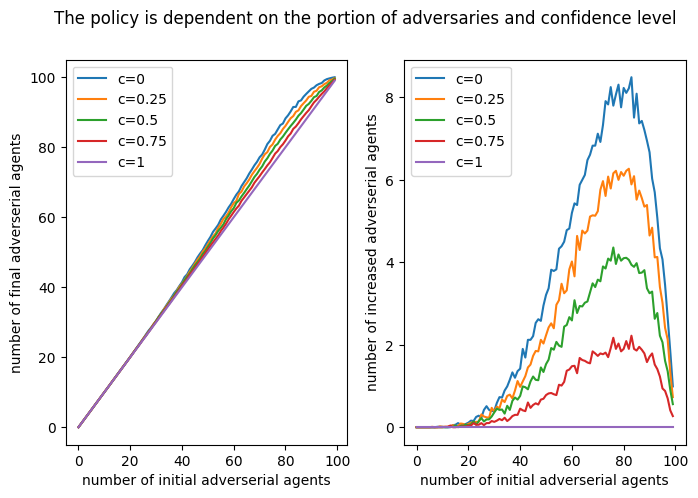

In [142]:
# simulation begins
# random.seed(random_seed)
num_agents = 100
confidences = [0, 0.25, 0.5, 0.75, 1]
depends_on_past_states = True # if the agent's policy depends on past states or current states?

num_purple_confidences = []
num_increase_confidence = []
for confidence in confidences:
    num_purple = [] # how many purple we end up with
    nums = [] # keep track of how many initial purples we tested
    num_portion = []
    num_increase = []
    for num_adv in range(num_agents):
        past_states = generate_states(num_agents=num_agents, num_purple=num_adv) # initial states: i purples, which means i adversaries
        
        # simulate for 10 times
        current_states_carlo = []
        current_purple_carlo = 0
        increased_purple_carlo = 0

        for iter in range(monte_carlo): 
            current_states, current_purple, increased_purple = simulation(num_agents=num_agents, depends_on_past_states=True,prev_states=past_states,
                                                                        func=None, impacted_by_portion=True, confidence=confidence, impact_from_others=None, cost_of_state=None)
            if iter == 0:
                current_states_carlo =  np.copy(current_states)
            else:
                current_states_carlo = current_states_carlo + current_states
            current_states_carlo = np.array(current_states_carlo)
            current_purple_carlo += current_purple
                


        current_states = [round(num) for num in current_states_carlo/monte_carlo]
        current_purple = current_purple_carlo/monte_carlo
        increased_purple = current_purple - num_adv
            
        num_purple.append(current_purple)
        nums.append(num_adv)
        num_increase.append(increased_purple)
        num_portion.append((sum(current_states) - num_adv) / (sum(past_states)+0.001))
    num_purple_confidences.append(num_purple)
    num_increase_confidence.append(num_increase)

plt.subplots(1, 2, figsize=(8, 5))

ax = plt.subplot(1,2,1)
for i in range(len(confidences)):
    plt.plot(nums, num_purple_confidences[i])
plt.legend(['c=0', 'c=0.25', 'c=0.5', 'c=0.75', 'c=1'])
plt.xlabel("number of initial adverserial agents")
plt.ylabel("number of final adverserial agents")

ax = plt.subplot(1,2,2)
for i in range(len(confidences)):
    plt.plot(nums, num_increase_confidence[i])
plt.legend(['c=0', 'c=0.25', 'c=0.5', 'c=0.75', 'c=1'])
plt.xlabel("number of initial adverserial agents")
plt.ylabel("number of increased adverserial agents")

plt.suptitle('The policy is dependent on the portion of adversaries and confidence level')
# ax = plt.subplot(1,3,3)
# plt.plot(nums, num_portion)
# plt.xlabel("number of initial adverserial agents")
# plt.ylabel("number of increased adverserial agents")
# plt.title("the policy depends on the portion of answering purple")
    
    

In [143]:
# other scenarios

# simulation begins
num_agents = 1000
cost = 0.5
depends_on_past_states = True # if the agent's policy depends on past states or current states?
num_purple = [] # how many purple we end up with
nums = [] # keep track of how many initial purples we tested
num_increase = []
for num_adv in range(num_agents):
    past_states = generate_states(num_agents=num_agents, num_purple=num_adv) # initial states: i purples, which means i adversaries
    current_states = past_states
    
    # 2nd round states:
    for i in range(num_agents):
        if past_states[i] == 1: # it is already purple
            # do nothing
            current_states[i] = past_states[i]
        else:
            if depends_on_past_states:
                states = past_states
            else:
                states = current_states
            
            state = policy(states=states, func = linear, impacted_by_portion=True, cost_of_state=(purple, cost))
            current_states[i] = state
            
    num_purple.append(sum(current_states))
    num_increase.append(sum(current_states) - num_adv)
    nums.append(num_adv)

# before finish this scenario, no plot yet
# plt.subplots(1, 2)

# ax = plt.subplot(1,2,1)
# plt.plot(nums, num_purple)
# plt.xlabel("number of initial adverserial agents")
# plt.ylabel("number of final adverserial agents")

# ax = plt.subplot(1,2,2)
# plt.plot(nums, num_increase)
# plt.xlabel("number of initial adverserial agents")
# plt.ylabel("number of increased adverserial agents")

# plt.title(f'the policy depends on the portion of answering purple and cost on purple {cost}')
    

In [144]:
# reward function of each agent